In [1]:
import numpy
import matplotlib.pyplot as plt 
from matplotlib import cm
import pandas
import mglearn

import os
import scipy

import sklearn
import sklearn.ensemble              # import seperatley otherwise sub module won't be imported
import sklearn.neural_network        # import seperatley otherwise sub module won't be imported
from sklearn.cluster import KMeans
import sklearn.feature_selection

import graphviz
import mpl_toolkits.mplot3d as plt3dd

import time

Most machine learning applications require not only the application of a single algorithm, but the chaining together of many different processing steps and machine learning models. In this chapter, we will cover how to use the Pipeline class to simplify the process of building chains of transformations and models. In particular, we will see how we can combine Pipeline and GridSearchCV to search over parameters for all processing steps at once.

# Example of model training workflow

In [3]:
# Load and split data with preprocessor steps
cancer = sklearn.datasets.load_breast_cancer();
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(cancer.data, cancer.target, random_state=0)
scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train);

In [5]:
# train and score/evaluate the data
X_train_scaled = scaler.transform(X_train);
X_test_scaled = scaler.transform(X_test);

svc = sklearn.svm.SVC();
svc.fit(X_train_scaled, y_train);
print("Test score: {:4.2f} %".format(100*svc.score(X_test_scaled, y_test)));

Test score: 97.20 %


In [7]:
# want to improve the resulting model? A naive apporach would be
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]};

grid = sklearn.model_selection.GridSearchCV(svc, param_grid=param_grid, cv=5, n_jobs=5);
grid.fit(X_train_scaled, y_train);


In [8]:
print("Best cross-validation accuracy: {:4.2f} %".format(100*grid.best_score_));
print("Best set score: {:4.2f} %".format(100*grid.score(X_test_scaled, y_test)));
print("Best parameters: ", grid.best_params_);

Best cross-validation accuracy: 98.12 %
Best set score: 97.20 %
Best parameters:  {'C': 1, 'gamma': 1}


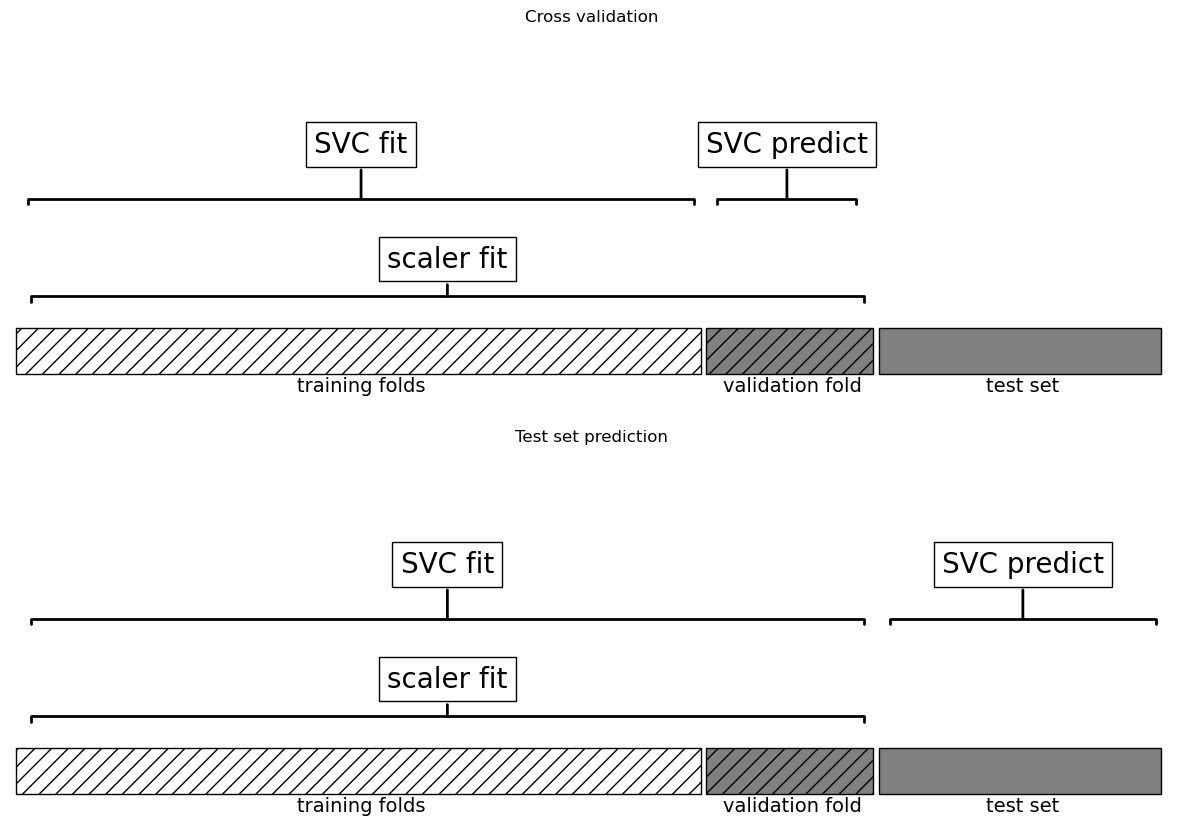

In [9]:
mglearn.plots.plot_improper_processing()

Improper processing is due to the scaler-preprocessing step for X_train data taking into account the validation data. When using the scaled X_train data (that also has the validation data). Thus, scaling is over optimistic as the scaling model is already fitted for the validation data. The pre-processing scalar values needs to be based on the training data (without the validation data). To get around this problem, the splitting of the dataset during cross-validation should be done before doing any preprocessing.


To achieve this in scikit-learn with the cross_val_score function and the Grid SearchCV function, we can use the Pipeline class. The Pipeline class is a class that allows “gluing” together multiple processing steps into a single scikit-learn estimattor. The Pipeline class itself has fit, predict, and score methods and behaves just like any other model in scikit-learn. The most common use case of the Pipeline class is in chaining preprocessing steps (like scaling of the data) together with a supervised model like a classifier.

# Building pipelines

In [15]:
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe = sklearn.pipeline.Pipeline([("scaler",sklearn.preprocessing.MinMaxScaler()),
                                      ("svm", sklearn.svm.SVC())]);

pipe.fit(X_train, y_train);
print("Test score: {:4.2f} %".format(100*pipe.score(X_test, y_test)))

Test score: 97.20 %
